In [7]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime

In [8]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [11]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrievel                                            ")
print("--------------------------------------------------------------------")

#create counters
record_count = 1
set_count = 1

#starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

Beginning Data Retrievel                                            
--------------------------------------------------------------------


In [12]:
#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
#run an api request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | aquiraz
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | teeli
Processing Record 14 of Set 1 | necochea
Processing Record 15 of Set 1 | hofu
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | ivdel
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | svetlyy
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | ostrowiec swietokrzyski
Processing R

Processing Record 40 of Set 4 | paradwip
City not found. Skipping...
Processing Record 41 of Set 4 | ibra
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | caravelas
Processing Record 48 of Set 4 | bonavista
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | simao
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | saskylakh
Processing Record 4 of Set 5 | pitkyaranta
Processing Record 5 of Set 5 | bagontapay
Processing Record 6 of Set 5 | paka
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | muli
Processing Record 9 of Set 5 | conchal
Processing Record 10 of Set 5 | lompoc
Processing Record 11 of Set 5 | pisco
Processing Record

Processing Record 30 of Set 8 | hanna
Processing Record 31 of Set 8 | bolshiye kaybitsy
City not found. Skipping...
Processing Record 32 of Set 8 | bethel
Processing Record 33 of Set 8 | cayenne
Processing Record 34 of Set 8 | maniitsoq
Processing Record 35 of Set 8 | rawson
Processing Record 36 of Set 8 | herat
Processing Record 37 of Set 8 | kommunisticheskiy
Processing Record 38 of Set 8 | bam
Processing Record 39 of Set 8 | srandakan
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | isangel
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | brae
Processing Record 44 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 45 of Set 8 | uttiramerur
Processing Record 46 of Set 8 | safaga
Processing Record 47 of Set 8 | nangavalli
Processing Record 48 of Set 8 | cervo
Processing Record 49 of Set 8 | kushima
Processing Record 50 of Set 8 | satitoa
City not found. Skipping...
Processing Record 1 of Set 9 | doka
Process

Processing Record 18 of Set 12 | tongren
Processing Record 19 of Set 12 | byron bay
Processing Record 20 of Set 12 | thongwa
Processing Record 21 of Set 12 | gorkovskiy
Processing Record 22 of Set 12 | nhulunbuy
Processing Record 23 of Set 12 | bolshoy tsaryn
City not found. Skipping...
Processing Record 24 of Set 12 | salinas
Processing Record 25 of Set 12 | mocuba
Processing Record 26 of Set 12 | turayf
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | ponta delgada
Processing Record 29 of Set 12 | leshukonskoye
Processing Record 30 of Set 12 | muzquiz
City not found. Skipping...
Processing Record 31 of Set 12 | edgewater
Processing Record 32 of Set 12 | inhambane
Processing Record 33 of Set 12 | baoshan
Processing Record 34 of Set 12 | pinhao
Processing Record 35 of Set 12 | bekesszentandras
Processing Record 36 of Set 12 | danville
Processing Record 37 of Set 12 | urbana
Processing Record 38 of Set 12 | bom jesus
Processing Record 39 of Set 12 | vicuna
Proc

In [13]:
#convert the array of dictionaries to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,31.26,85,100,5.59,GL,2022-05-05 04:24:55
1,Ponta Do Sol,32.6667,-17.1000,63.23,69,22,5.93,PT,2022-05-05 04:24:55
2,Busselton,-33.6500,115.3333,64.04,40,0,14.14,AU,2022-05-05 04:24:56
3,Yellowknife,62.4560,-114.3525,37.56,100,40,8.99,CA,2022-05-05 04:24:56
4,Cape Town,-33.9258,18.4232,58.12,93,100,3.44,ZA,2022-05-05 04:20:03
5,Tura,25.5198,90.2201,80.64,65,13,2.08,IN,2022-05-05 04:24:57
6,Aquiraz,-3.9014,-38.3911,75.29,88,100,7.56,BR,2022-05-05 04:24:57
7,La Ronge,55.1001,-105.2842,35.85,87,100,14.97,CA,2022-05-05 04:24:58
8,Klaksvik,62.2266,-6.5890,41.92,75,79,7.23,FO,2022-05-05 04:24:58
9,Jamestown,42.0970,-79.2353,49.64,92,75,3.44,US,2022-05-05 04:24:59


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nanortalik,GL,2022-05-05 04:24:55,60.1432,-45.2371,31.26,85,100,5.59
1,Ponta Do Sol,PT,2022-05-05 04:24:55,32.6667,-17.1000,63.23,69,22,5.93
2,Busselton,AU,2022-05-05 04:24:56,-33.6500,115.3333,64.04,40,0,14.14
3,Yellowknife,CA,2022-05-05 04:24:56,62.4560,-114.3525,37.56,100,40,8.99
4,Cape Town,ZA,2022-05-05 04:20:03,-33.9258,18.4232,58.12,93,100,3.44


In [15]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file,index_label="City=ID")

In [16]:
#extract relevant fields from the df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]

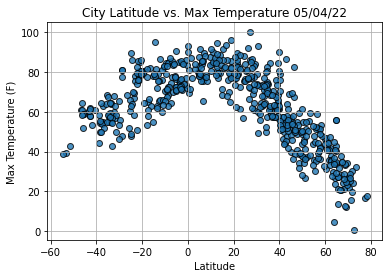

In [17]:
#import time module
import time
#build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig1.png")
plt.show()

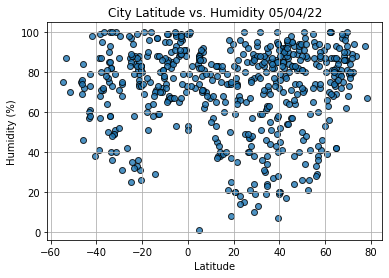

In [18]:
#build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig2.png")
plt.show()

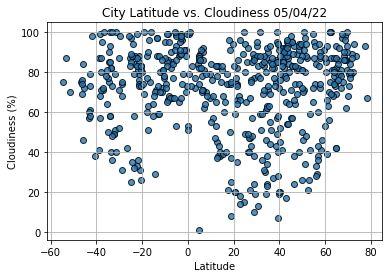

In [19]:
#build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig3.png")
plt.show()

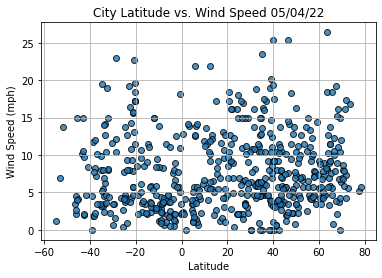

In [20]:
#build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig4.png")
plt.show()

In [21]:
#import linregress
from scipy.stats import linregress

#create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    #run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    
    #calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values*slope + intercept
    #get the equation of the line
    line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [22]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

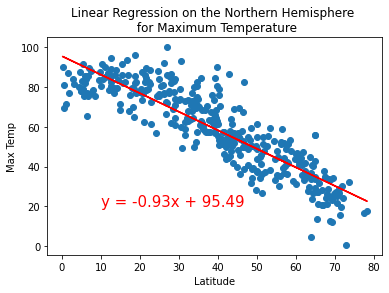

In [23]:
#linear regression on the northern hemisphere (max temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

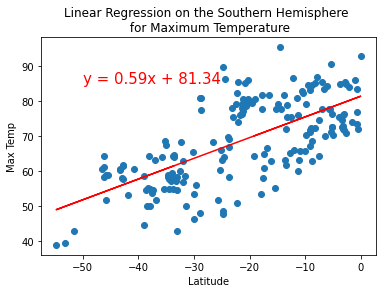

In [24]:
#linear regression on the southern hemisphere (max temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

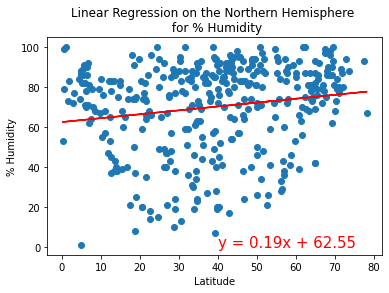

In [25]:
#linear regression on the northern hemisphere (humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,0))

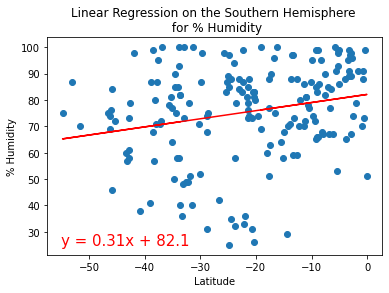

In [26]:
#linear regression on the southern hemisphere (humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,25))

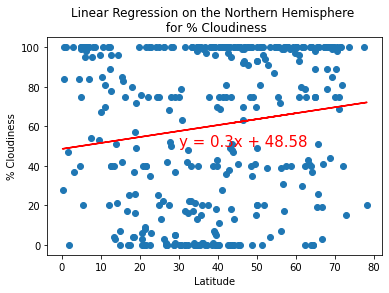

In [27]:
#linear regression on the northern hemisphere (cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,50))

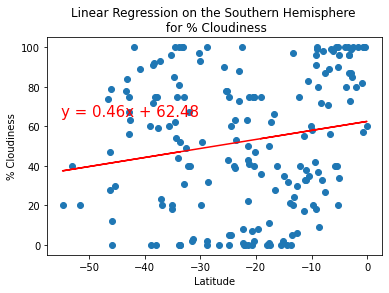

In [28]:
#linear regression on the southern hemisphere (cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,65))

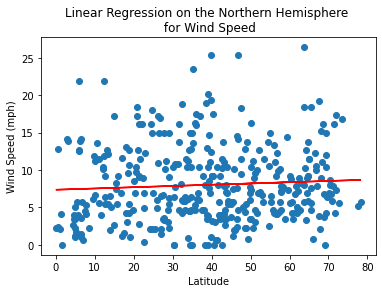

In [29]:
#linear regression on the northern hemisphere (wind speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(45,30))

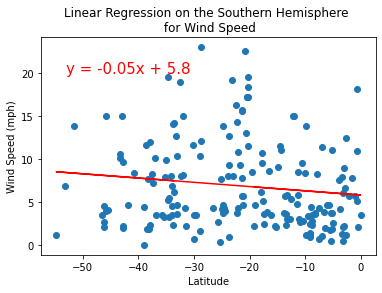

In [30]:
#linear regression on the southern hemisphere (wind speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-53,20))